[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/08_monte_carlo/poisson_demo.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
def simulate_ncustomers(a = 0.5, N=100, Nday=1, ntrials=100000):
    """Main function to simulate the Poisson process

    Args:
        a (float): average number of customers per day
        N (int): divide a day into N subintervals
        Nday (int): number of days to run
        ntrials (int): number of experiments

    Returns:
        numpy.ndarray: total number of customers for each experiment
        
    """
    
    # Generate uniform random numbers
    r = np.random.uniform(0, 1, [N * Nday, ntrials])
 
    # Assign 1 if there is a customer
    customers = np.zeros([N * Nday, ntrials])
    customers[r < a/N] = 1

    # Sum over columns to get the total number of customers in each experiment 
    ncustomers = customers.sum(axis = 0)
    
    return ncustomers

In [3]:
# Run simulation
ncustomers = simulate_ncustomers()

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

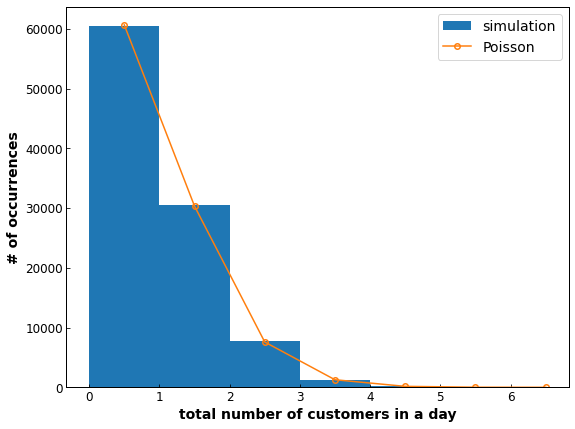

In [5]:
# Compare simulation to Poisson distribution 
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot simulation result
count, bins, ignored = ax.hist(ncustomers, bins = np.arange(0, ncustomers.max() + 1), label = 'simulation')
# Plot theoretical distribution
ntrials = 100000 # multiply just to make sure both results are of the same scale
ax.plot(bins + 0.5, poisson.pmf(bins, mu = 0.5)*ntrials, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label = 'Poisson')

# Set axes labels and legend
ax.set_xlabel('total number of customers in a day')
ax.set_ylabel('# of occurrences')
ax.legend(loc='upper right')

plt.show()